# Lab 4.1: Likelihood

One way to estimate parameters for a distribution is to calculate the likelihood of the parameter values given the data that we observe.

The likelihood of a parameter $\theta$ is given by the notion $\mathcal{L}(\theta)$ which has the same/similar form as the probability function $p(data \mid \theta)$.

### Question 1

The file `outage.csv` contains the number of power outages Kampala (Ugandan city) experiences each month for the past 72 months

1. Read in the `https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv` using pandas
2. Plot the data on a histogram 
  - Set `normed=True` to get the probability density histogram
  - Set `bins=20` to get smaller bins for the histogram

3.  What distribution would you consider fitting the data to given the nature of the data ?
  - Think about if the data is discrete or continuous 
  - Think about what the data describes

4. Write down the equation that would model the random variable in question with the distribution you have chosen

   For example:
   - $\text{Let X be the number of heads in 5 coin flips}$
   - $X \sim Binomial(n, p)$

5. Write down the likelihood function to calculate the likelihood of a given parameter value 

   **Hint**:
   - A **parameter** of the binomial distribution will be `n` or `p` for example
   - This will be based on the distribution you have chosen above
   - The likelihood function would be the product of the probabilities for each data point 
  
6. Write a python function that will calculate the likelihood of a parameter given the data
   - The function will take a parameter and the data
   - Use `scipy.stats` and `numpy.product()`
 
7. Define a range of possible values for the parameter from `14` to `21` (using `numpy.linspace`).

   Calculate the likelihood for each of the values defined in the range.
   
   Plot the values ($x$) against the likelihood ($L(\theta)$)  

8. Write a function to calculate the log-likelihood.

9. Find the maximum likelihood estimate for the parameter of interest (use `numpy.argmax`)

In [1]:
%pylab inline
import pandas as pd
from scipy import stats
outage_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv')
outage_data.head()

Populating the interactive namespace from numpy and matplotlib


,0
0,20
1,20
2,14
3,14
4,18


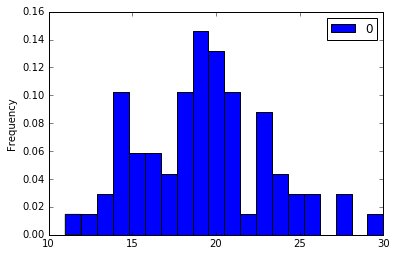

In [2]:
outage_data.plot(kind='hist',bins=20, normed=True)

Distribution is discrete since our distribution contains number of days.

We can consider a Poisson distribution since we are counting events (number of outage days per month).

X ~ Poi($\lambda$)

# Likelihood function:
$L(p) = P(X=x)$ when $X ~ Poi(\lambda=p)$

In [3]:
# This function allows us to pass a lambda to get a poisson distribution.
# Note that we perform a sum of all probabilities.
def likehood_pois(data, lambda_like):
    pois = stats.poisson(lambda_like)
    return sum(pois.pmf(data))

In [4]:
# We try with a lambda of 14.
likehood_pois(outage_data['0'],14)

3.3574236328043647

In [5]:
# This function will provide the best lambda from a list of lambdas provided
# in linspace(14,21,100).
def lambda_test(data):
    lambda_list = []
    lambda_value = []
    for x in range(len(linspace(14,21,100))):
        l = likehood_pois(data, x)
        lambda_list.append(l)
        lambda_value.append(x)
        maxi = lambda_list.index(max(lambda_list))
    
    return lambda_value[maxi]

In [6]:
lambda_test(outage_data)

19

## Log-likelihood:

$P(k_i) = \frac{\lambda^k_i * e^{-\lambda}}{k_i!}$

$L(\lambda|k) = \sum_{i=1}^{n}P(k_i)$

$l(\lambda) = log(L(\lambda|k)) = log(\prod_{i=1}^{n}P(k_i))$

$log(L(\lambda|k)) = log(\prod_{i=1}^{n}P(k_i))$

In [7]:
def log_likehood_pois(data):
    number_sucess = lambda_test(data)
    lambda_like = linspace(14,21,100)
    log_likehood = log(stats.poisson.pmf(number_sucess,lambda_like))
    max_index = argmax(log_likehood)
    axvline(x = lambda_like[max_index])
    print(lambda_like[max_index], log_likehood[max_index])
    return plot(lambda_like, log_likehood)

19.0202020202 -2.39555431547


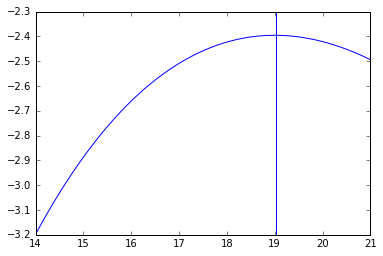

In [8]:
log_likehood_pois(outage_data['0'])

### Question 2

The file `plants.csv` contains heights to 1,000 plants. You are told the data resembles a normal distribution with a standard deviation of 3cm.

1. Read in `https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv` using pandas and plot the data on a histogram
   
2. Define a range of possible values for the mean (from 32 to 42)
  
3. Calculate the log-liklihood for each of the values in the range 
  
4. Plot the log-likelihood function

5. Find the MLE for the mean

In [9]:
plants_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv')
plants_data.head()

,0
0,38.908525
1,43.156130
2,39.910492
3,42.520638
4,40.462430


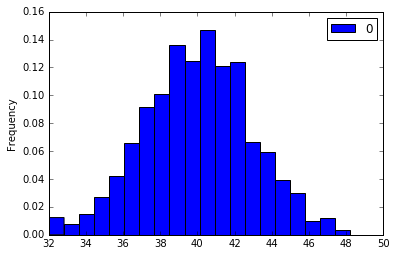

In [10]:
plants_data.plot(kind='hist',bins=20, normed=True)

In [11]:
def likehood_normal(data, mu_like, sigma):
    norm = stats.norm(mu_like, sigma)
    return sum(norm.pdf(data))

In [12]:
likehood_normal(plants_data['0'], 40, 3)

96.085882293381047

In [13]:
def mu_test(data,sigma):
    mu_list = []
    mu_value = []
    for x in range(32, 42):
        l = likehood_normal(data, x, sigma)
        mu_list.append(l)
        mu_value.append(x)
        maxi = mu_list.index(max(mu_list))
        
    return mu_value[maxi]

In [14]:
mu_test(plants_data['0'],3)

40

In [15]:
def log_likehood_normal(data, sigma):
    normal_range = mu_test(data,sigma)
    mu_like = linspace(32,42,1000)
    log_norm_likehood = log(stats.norm.pdf(mu_like, normal_range, sigma))
    max_index = argmax(log_norm_likehood)
    axvline(x = mu_like[max_index])
    print(mu_like[max_index], log_norm_likehood[max_index])
    return plot(mu_like, log_norm_likehood)

39.997997998 -2.01755104454


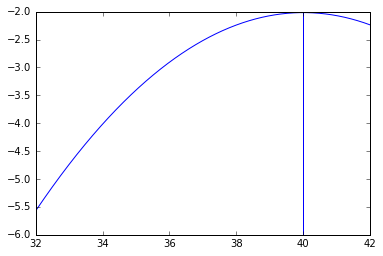

In [16]:
log_likehood_normal(plants_data['0'], 3)